Index:190098M
Name: CHAMARA RPO

In [1]:
#Q01
import numpy as np
import cv2 as cv

f=open(r'templeSparseRing/templeSR_par.txt','r')
assert f is not None

# Reading the information on the first image
n=int(f.readline())
l=f.readline().split()
im1_fn=l[0]
K1=np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1=np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1=np.array([float(i) for i in l[19:22]]).reshape((3,1))

l = f.readline().split()
im2_fn =l[0]

K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

im1 = cv.imread(r'templeSparseRing/'+im1_fn,cv.IMREAD_COLOR)
im2 = cv.imread(r'templeSparseRing/'+im2_fn,cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None


In [6]:
sift=cv.xfeatures2d.SIFT_create()
kp1,decs1=sift.detectAndCompute(im1,None)
kp2,decs2=sift.detectAndCompute(im2,None)

FLANN_INDEX_KDTREE=1
index_params=dict(algorithm=FLANN_INDEX_KDTREE,tree=5)
search_params=dict(checks=100)
flann=cv.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(decs1,decs2,k=2)



In [7]:
#Q02
good=[]
pts1=[]
pts2=[]
for i,(m,n) in enumerate(matches):
    if m.distance<0.7*n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)
        
pts1=np.array(pts1)
pts2=np.array(pts2)
F,mask=cv.findFundamentalMat(pts1,pts2,cv.FM_RANSAC)
F


array([[ 1.49034037e-06,  1.44154168e-05, -2.53948320e-02],
       [-8.25788252e-06,  8.67005344e-08,  4.00767127e-03],
       [ 2.27526901e-02, -7.28270380e-03,  1.00000000e+00]])

In [8]:
E = K2.T@F@K1
E

array([[ 3.44509489e+00,  3.34434549e+01, -3.25145725e+01],
       [-1.91581088e+01,  2.01870994e-01,  2.33852108e+00],
       [ 3.21786978e+01, -4.43004055e+00, -6.22266684e-03]])

In [9]:
#Q03
retval,R,t,mask=cv.recoverPose(E,pts1,pts2,K1)

R_t_1=np.concatenate((R1,t1),axis=1) #3 x 4
R2_=R1@R
t2_=R1@t
R_t_2=np.concatenate((R2_,t2_),axis=1) #3 x 4

P1 = K1 @ np.hstack((R1,t1))

In [10]:
#Q04
P2_=K2@R_t_2
P2_

array([[ 1.58524669e+02,  1.53324446e+03, -1.64453374e+02,
        -9.53099575e+02],
       [ 1.53407871e+03, -1.25194936e+02, -1.42282633e+02,
         4.27897189e+01],
       [ 7.55162306e-02,  8.27859886e-02, -9.93702057e-01,
         6.49896959e-01]])

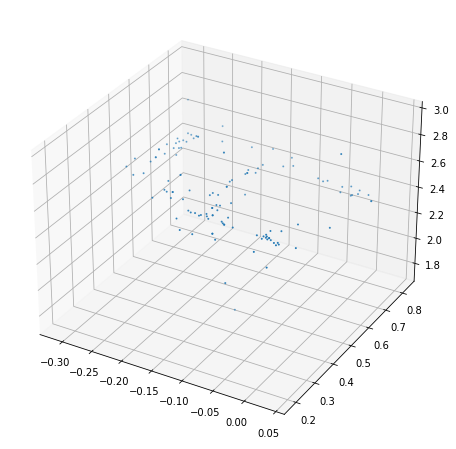

In [11]:
#Q05

points4d=cv.triangulatePoints(P1,P2_,pts1.T,pts2.T)
points4d/=points4d[3,:]

import matplotlib.pyplot as plt

X=points4d[0,:]
Y=points4d[1,:]
Z=points4d[2,:]

fig=plt.figure(1,figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z,s=1,cmap='gray')
plt.show()